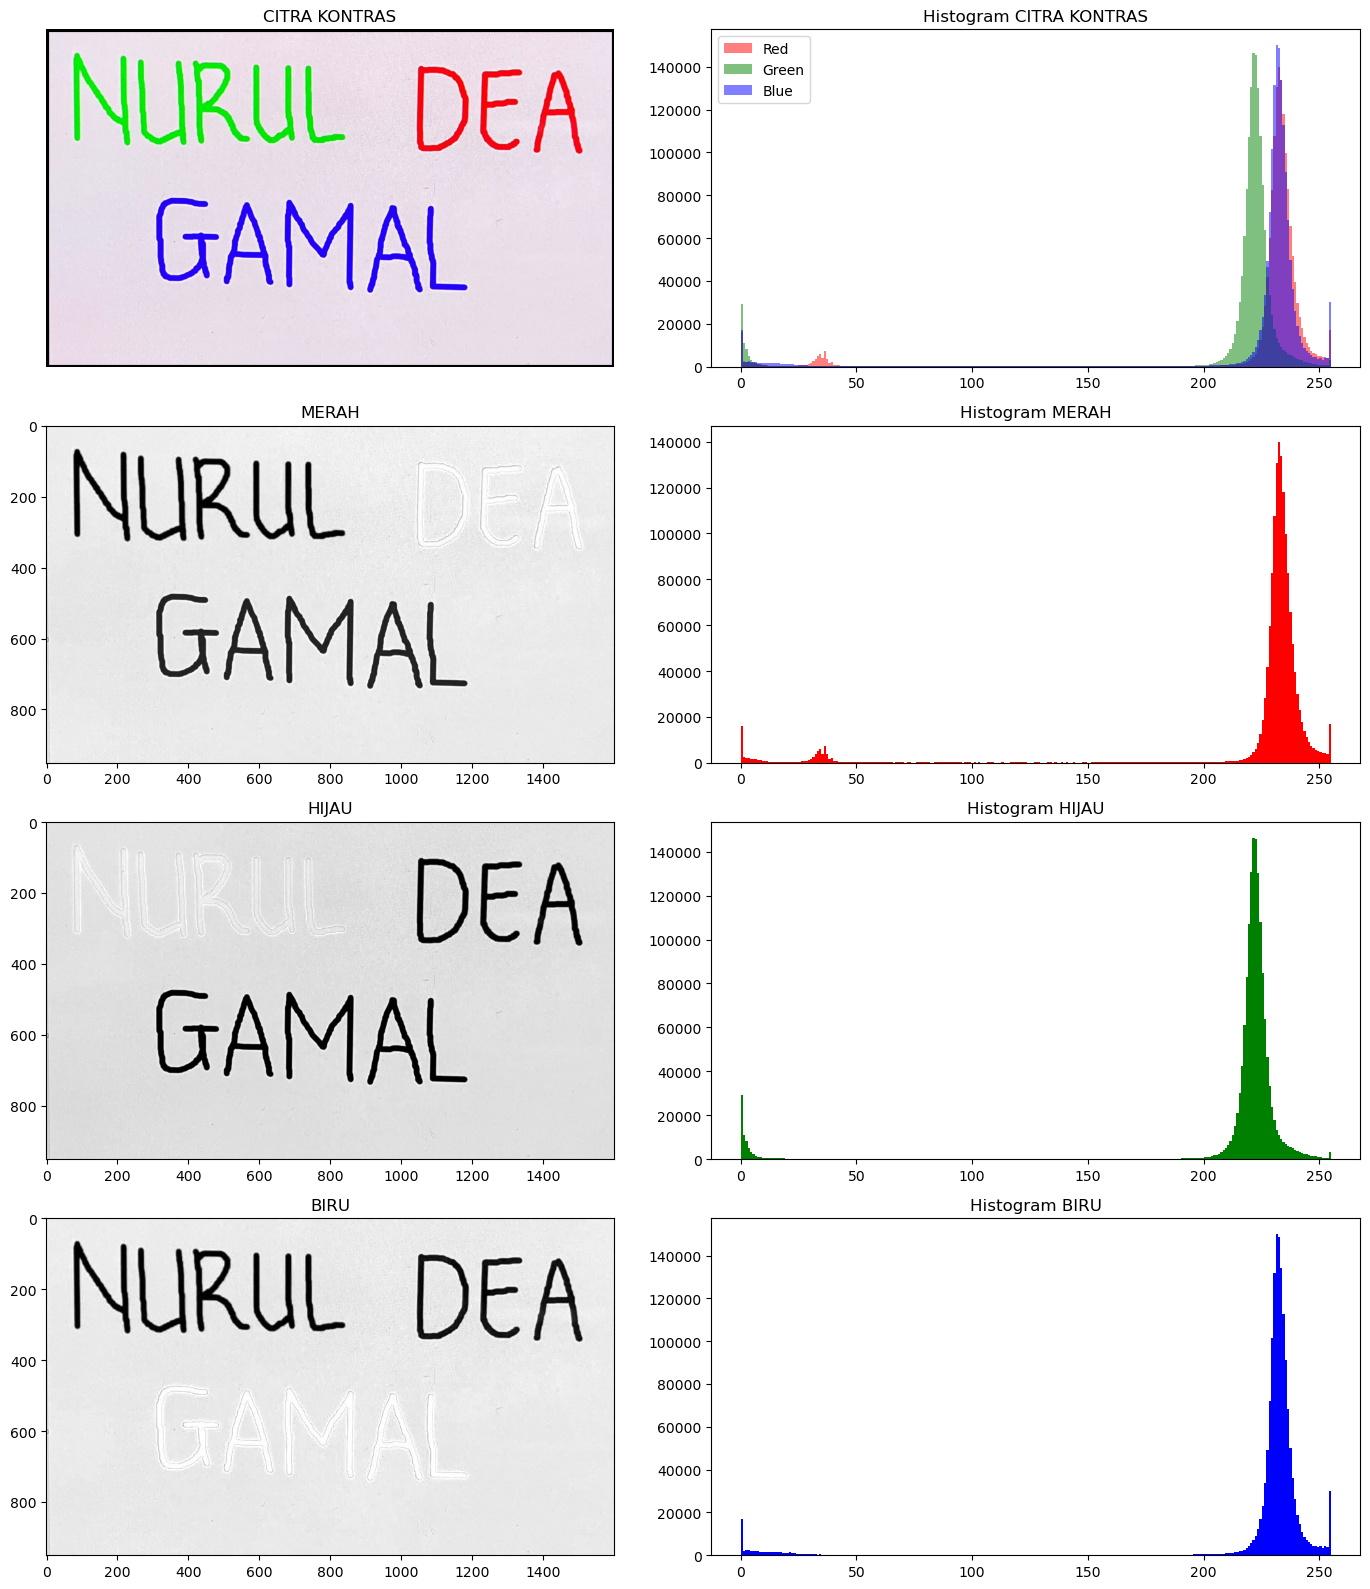

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Baca gambar
image_path = "ndea rgb.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ekstrak channel warna
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

# Tampilkan hasil dalam grid 4x2
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

# CITRA KONTRAS
axes[0, 0].set_title('CITRA KONTRAS')
axes[0, 0].imshow(image)
axes[0, 0].axis('off')
height, width, _ = image.shape
rect = patches.Rectangle((0, 0), width, height, linewidth=3, edgecolor='black', facecolor='none')
axes[0, 0].add_patch(rect)

axes[0, 1].hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
axes[0, 1].hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
axes[0, 1].hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
axes[0, 1].set_title("Histogram CITRA KONTRAS")
axes[0, 1].legend()

# MERAH
axes[1, 0].set_title('MERAH')
axes[1, 0].imshow(r, cmap='gray')
axes[1, 0].axis('on')

axes[1, 1].hist(r.ravel(), bins=256, color='red')
axes[1, 1].set_title("Histogram MERAH")

# HIJAU
axes[2, 0].set_title('HIJAU')
axes[2, 0].imshow(g, cmap='gray')
axes[2, 0].axis('on')

axes[2, 1].hist(g.ravel(), bins=256, color='green')
axes[2, 1].set_title("Histogram HIJAU")

# BIRU
axes[3, 0].set_title('BIRU')
axes[3, 0].imshow(b, cmap='gray')
axes[3, 0].axis('on')

axes[3, 1].hist(b.ravel(), bins=256, color='blue')
axes[3, 1].set_title("Histogram BIRU")

plt.tight_layout()
plt.show()

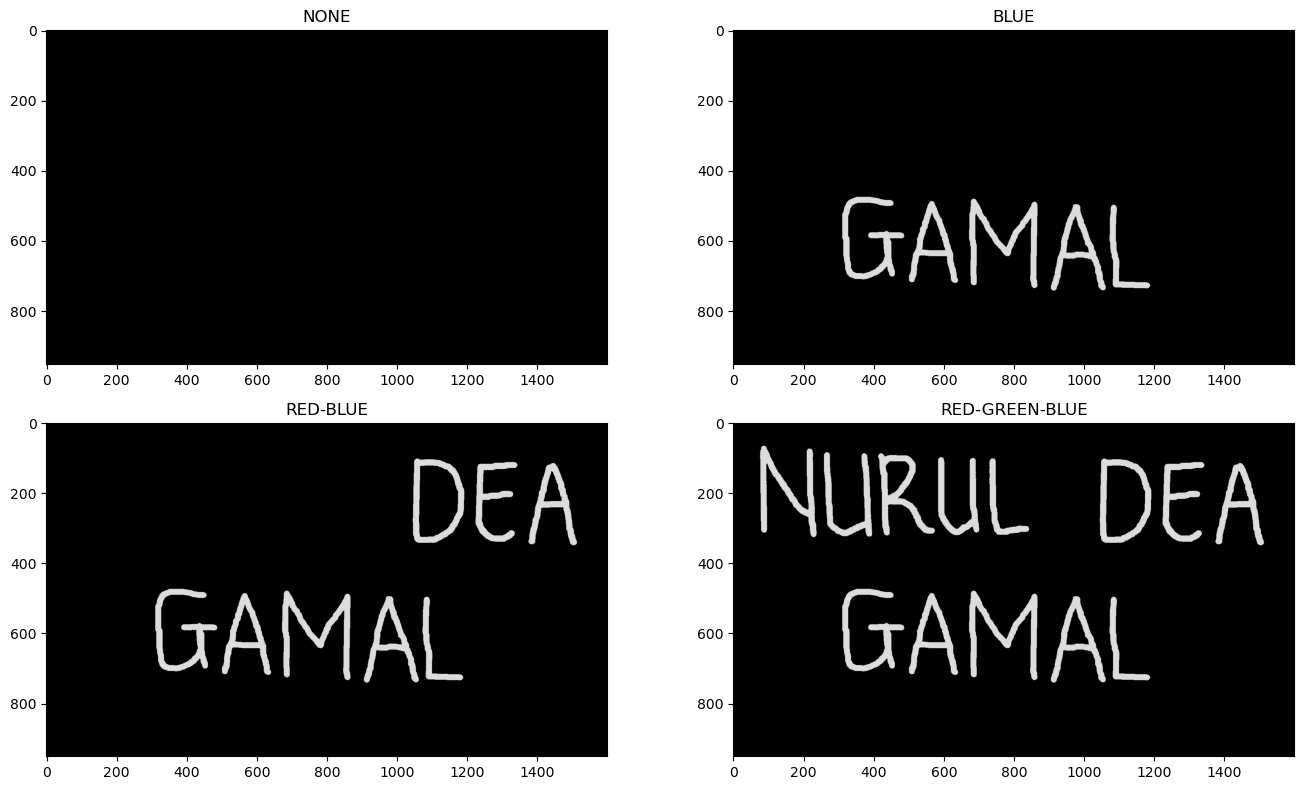

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan konversi ke RGB
image_path = "ndea rgb.jpg"  # Ganti jika perlu
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Rentang deteksi warna
lower_blue = np.array([100, 100, 50])
upper_blue = np.array([140, 255, 255])
lower_red1 = np.array([0, 100, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 50])
upper_red2 = np.array([180, 255, 255])
lower_green = np.array([40, 100, 50])
upper_green = np.array([80, 255, 255])

# Mask warna
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red = cv2.bitwise_or(
    cv2.inRange(hsv, lower_red1, upper_red1),
    cv2.inRange(hsv, lower_red2, upper_red2)
)
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Gabungan mask
none_mask = np.zeros_like(mask_blue)
red_blue_mask = cv2.bitwise_or(mask_red, mask_blue)
rgb_mask = cv2.bitwise_or(cv2.bitwise_or(mask_red, mask_blue), mask_green)

# Fungsi untuk menampilkan hasil dengan warna putih silver
def apply_mask_silver(mask):
    output = np.zeros_like(image_rgb)
    output[mask > 0] = [220, 220, 220]  
    return output

# Hasil visualisasi
results = [
    ("NONE", apply_mask_silver(none_mask)),
    ("BLUE", apply_mask_silver(mask_blue)),
    ("RED-BLUE", apply_mask_silver(red_blue_mask)),
    ("RED-GREEN-BLUE", apply_mask_silver(rgb_mask)),
]

# Tampilkan
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for ax, (title, result) in zip(axes.ravel(), results):
    ax.imshow(result)
    ax.set_title(title)
    ax.axis("on")

plt.tight_layout()
plt.show()

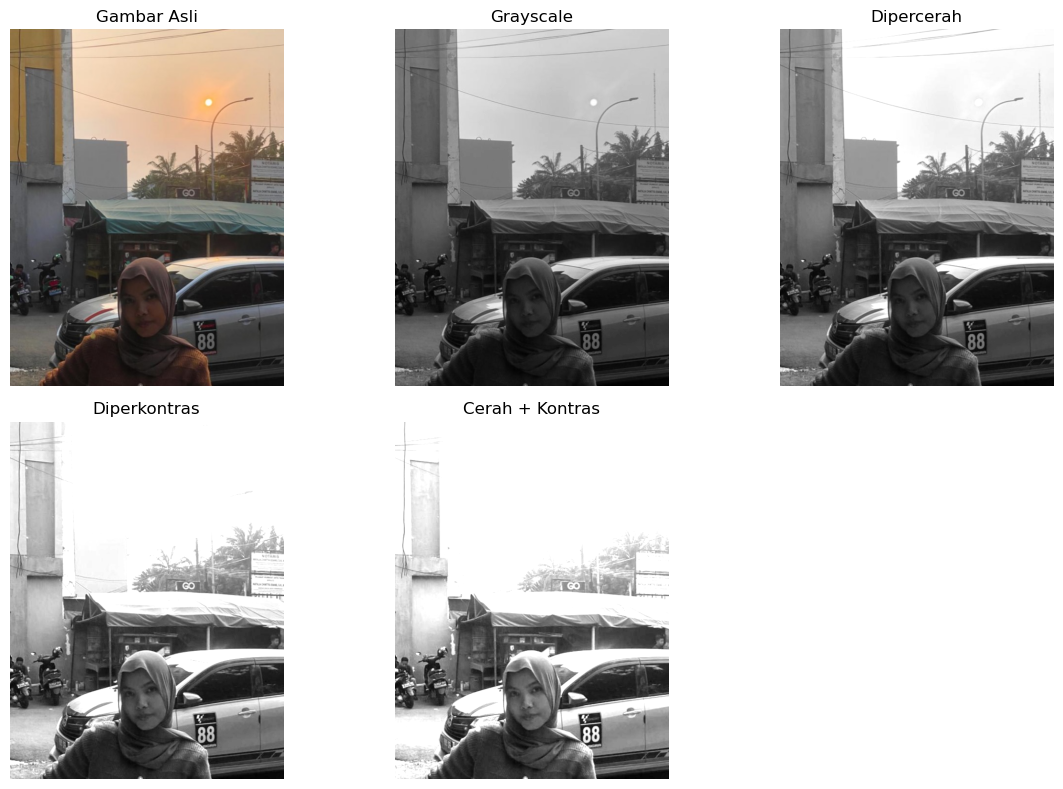

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar 
img = cv2.imread('nuruldeag rgb.jpg')

# Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tingkatkan kecerahan
bright = cv2.convertScaleAbs(gray, alpha=1, beta=50) 

# Tingkatkan kontras
contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=0) 

# Gabungan peningkatan brightness dan kontras
bright_contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=50)

# Tampilkan semua hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(bright, cmap='gray')
plt.title("Dipercerah")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(contrast, cmap='gray')
plt.title("Diperkontras")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(bright_contrast, cmap='gray')
plt.title("Cerah + Kontras")
plt.axis("off")

plt.tight_layout()
plt.show()
